<a href="https://colab.research.google.com/github/Amolkottalagi/Online-Voting-System/blob/main/Movie_Recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
path = kagglehub.dataset_download("dev0914sharma/dataset")

100%|██████████| 874k/874k [00:00<00:00, 64.5MB/s]

Extracting files...


In [ ]:
print(path)

/root/.cache/kagglehub/datasets/dev0914sharma/dataset/versions/1


In [ ]:
!ls -l /root/.cache/kagglehub/datasets/dev0914sharma/dataset/versions/1

total 2084
-rw-r--r-- 1 root root 2079263 Dec 12 13:20 Dataset.csv
-rw-r--r-- 1 root root   49292 Dec 12 13:20 Movie_Id_Titles.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_1 = pd.read_csv("/root/.cache/kagglehub/datasets/dev0914sharma/dataset/versions/1/Dataset.csv")

In [ ]:
df_1.head(10)

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
5,22,377,1,878887116
6,244,51,2,880606923
7,166,346,1,886397596
8,298,474,4,884182806
9,115,265,2,881171488


In [ ]:
df_2 =pd.read_csv("/root/.cache/kagglehub/datasets/dev0914sharma/dataset/versions/1/Movie_Id_Titles.csv")

In [ ]:
df_2.head(10)

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...
6,7,Twelve Monkeys (1995)
7,8,Babe (1995)
8,9,Dead Man Walking (1995)
9,10,Richard III (1995)


In [ ]:
df_1.shape

(100003, 4)

(100003, 4)

In [ ]:
df_2.shape

(1682, 2)

(1682, 2)

In [ ]:
df_1.isnull().sum()

,0
user_id,0
item_id,0
rating,0
timestamp,0


In [ ]:
df_2.isnull().sum()

,0
item_id,0
title,0


In [ ]:
df_1.duplicated().sum()

np.int64(0)

In [ ]:
df_2.duplicated().sum()

np.int64(0)

In [ ]:
df_2.value_counts("item_id").head()

,count
item_id,
1682,1
1,1
1666,1
1665,1
1664,1


In [ ]:
df_2.value_counts("title")

,count
title,
Chasing Amy (1997),2
"Butcher Boy, The (1998)",2
"Substance of Fire, The (1996)",2
Deceiver (1997),2
Nightwatch (1997),2
...,...
Four Rooms (1995),1
Four Days in September (1997),1
Forrest Gump (1994),1


In [ ]:
df_2=df_2.drop_duplicates(subset="title")
df_2

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1676,1677,Sweet Nothing (1995)
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1680,1681,You So Crazy (1994)


In [ ]:
print(df_1.columns)

Index(['user_id', 'item_id', 'rating', 'timestamp'], dtype='object')


In [ ]:
print(df_2.columns)

Index(['item_id', 'title'], dtype='object')


In [ ]:
df = df_1.merge(df_2,on="item_id",how="inner")
df

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,0,172,5,881250949,"Empire Strikes Back, The (1980)"
2,0,133,1,881250949,Gone with the Wind (1939)
3,196,242,3,881250949,Kolya (1996)
4,186,302,3,891717742,L.A. Confidential (1997)
...,...,...,...,...,...
99390,880,476,3,880175444,"First Wives Club, The (1996)"
99391,716,204,5,879795543,Back to the Future (1985)
99392,276,1090,1,874795795,Sliver (1993)
99393,13,225,2,882399156,101 Dalmatians (1996)


In [ ]:
rating = df.groupby("title")["rating"].mean()
rating

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
...,...
Young Guns II (1990),2.772727
"Young Poisoner's Handbook, The (1995)",3.341463
Zeus and Roxanne (1997),2.166667


In [ ]:
rating = df.groupby('title')['rating'].count()
rating

,rating
title,
'Til There Was You (1997),1
1-900 (1994),1
101 Dalmatians (1996),1
12 Angry Men (1957),1
187 (1997),1
...,...
Young Guns II (1990),1
"Young Poisoner's Handbook, The (1995)",1
Zeus and Roxanne (1997),1


In [ ]:
movie_matrix = df.pivot_table(index="user_id",columns="title",values="rating")
movie_matrix

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
854.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
862.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
movie_matrix['Star Wars (1977)'].mean()

np.float64(4.359589041095891)

In [ ]:
df_Star_Wars = movie_matrix['Star Wars (1977)']
df_Star_Wars

,Star Wars (1977)
user_id,
7.0,NaN
10.0,NaN
13.0,NaN
60.0,NaN
62.0,NaN
...,...
854.0,NaN
862.0,NaN
863.0,NaN


In [ ]:
corr_Star_Wars = movie_matrix.corrwith(df_Star_Wars)
corr_Star_Wars = pd.DataFrame(corr_Star_Wars,columns=["correlation"])
corr_Star_Wars = corr_Star_Wars.reset_index()
corr_Star_Wars = corr_Star_Wars.dropna()
corr_Star_Wars = corr_Star_Wars.sort_values("correlation",ascending=False)
corr_Star_Wars = corr_Star_Wars.merge(rating,on="title",how="inner")
corr_Star_Wars = corr_Star_Wars[corr_Star_Wars["num of ratings"]>50].sort_values("correlation",ascending=False)
corr_Star_Wars = corr_Star_Wars.head(10)
top10_Star_War_rec = corr_Star_Wars[['title','correlation']]
top10_Star_War_rec

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2914: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


,title,correlation


In [ ]:
rating = pd.DataFrame(df.groupby("title")["rating"].mean())
rating["num of ratings"] = df.groupby("title")["rating"].count()
rating

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,1
1-900 (1994),2.600000,1
101 Dalmatians (1996),2.908257,1
12 Angry Men (1957),4.344000,1
187 (1997),3.024390,1
...,...,...
Young Guns II (1990),2.772727,1
"Young Poisoner's Handbook, The (1995)",3.341463,1
Zeus and Roxanne (1997),2.166667,1


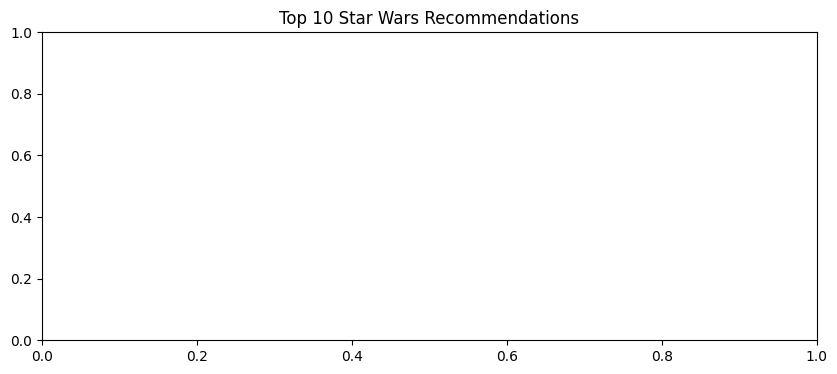

In [ ]:
plt.figure(figsize=(10,4))
sns.barplot(y="title",x="correlation", data=top10_Star_War_rec )
plt.title("Top 10 Star Wars Recommendations")
plt.show()